# Introduction
This is an exercise from the Data Analysis course of Free Code Camp.
Boilerplate medical data visualizer
https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/medical-data-visualizer

The idea is to answer some questions to do some practice.

Data origin: couldn't foun it

My final doc on the Camp repo (not working correctly):
https://replit.com/@PedroTealdi/boilerplate-medical-data-visualizer-2#medical_data_visualizer.py

My final doc on Hithub:
https://github.com/petert92/Medical_Data_Visualizer_freeCodeCamp.git

## Questions
- How many people of each race are represented in this dataset? This should be a Pandas series with race names as the index labels. (race column)
- What is the average age of men?
- What is the percentage of people who have a Bachelor's degree?
- What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?
- What percentage of people without advanced education make more than 50K?
- What is the minimum number of hours a person works per week?
- What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?
- What country has the highest percentage of people that earn >50K and what is that percentage?
- Identify the most popular occupation for those who earn >50K in India.

# Imports

In [3]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Introductional data study

In [4]:
# Import data
df = pd.read_csv('medical_examination.csv')
df_original = df.copy()

In [5]:
df.head()
# The data correspond to the exercise details except for the id and the sex. Id It's not continuos => id != index; Sex isn't categorical

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [41]:
# Array elements consecutive?
# Code taken from https://www.geeksforgeeks.org/check-if-array-elements-are-consecutive/
# The function checks if the array elements
# are consecutive. If elements are consecutive,
# then returns true, else returns false
def areConsecutive(arr, n):
     
    # Sort the array
    arr.sort()
    # checking the adjacent elements
    for i in range (1,n):
        if(arr[i]!=arr[i-1]+1):
            return False;
             
    return True;   
     
# Driver Code
arr = df.id.tolist()
n = len(arr)
if(areConsecutive(arr, n) == True):
    print("Array elements are consecutive ")
else:
    print("Array elements are not consecutive ")

Array elements are not consecutive 


In [5]:
df.info()
# 70k rows; non-null; 13 features, all numbers [int64] but weight [float64]);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [42]:
df.describe()
#symetric: all(not discrets ones) but sex and ap_hi a bit less; ap_x have negative values ¿?; age in days; 

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
# Symmetric
# Symmetric: [-0.5,0.5]
# Moderately skewed: [-1,0.5] & [0.5,1]
# Highly skewed: out of [-1,1]
df.kurtosis()

id               -1.198374
age              -0.823447
sex              -1.585940
height            7.943653
weight            2.586825
ap_hi          7580.074738
ap_lo          1425.914585
cholesterol       0.993901
gluc              4.294377
smoke             6.444250
alco             13.655125
active            0.339296
cardio           -2.000056
dtype: float64

In [6]:
# Age
print('In days: \n{} \n\nIn years: \n{}'.format(df.age.describe(), df.age.describe()/365))
# In years -> min=29, max=65, mean=med=53, std=6.8 -> 6.8/(65-29)*100=19%; range mean +- std: [46.2, 59.8] ~ [Q1,Q3]

In days: 
count    70000.000000
mean     19468.865814
std       2467.251667
min      10798.000000
25%      17664.000000
50%      19703.000000
75%      21327.000000
max      23713.000000
Name: age, dtype: float64 

In years: 
count    191.780822
mean      53.339358
std        6.759594
min       29.583562
25%       48.394521
50%       53.980822
75%       58.430137
max       64.967123
Name: age, dtype: float64


In [32]:
df.height.value_counts()[:10]

165    5853
160    5022
170    4679
168    4399
164    3396
158    3313
162    3257
169    2791
156    2755
167    2538
Name: height, dtype: int64

In [3]:
# Values count of features
for feature in df.columns[2:]:
    i = str(feature)
    print('\n\n{}: \nDescribe: \n{} \n\nValues Counts: \n{}'.format(i, df[i].describe(), df[i].value_counts()))

'''
> Sex: 3 differt sexs; 1:45522, 2:24467, 3:11 don't know the meaning of each number
>  [CLEAN] Height: min=55, max=250, mean=med=165, std=8 -> 8/(250-55)*100=4%; range mean +- std: [157, 173] ~ [Q1,Q3]=[159, 170]
109 differt heights
1st five heights (165+160+170+168+164) = 23349 persons = 33.4%
1st ten heights (165+130+170+168+164+158+162+169+156+167) = 38003 persons = 54%
> Weight: min=10, max=200, mean=74~med=72, with min age=[29,65] it's too rare the weight_min. There're 7 weights<30kg
10% = 65kg+70kg
> [CLEAN] Ap_hi (systolic pressure): min=-150, max=16020, mean=128~med=120;
ap_hi<90 -> 321, ap_hi>120 -> 29263, sum()=29584
> [CLEAN] Ap_lo (diastolic pressure): min=-70, max=11000, mean=96, med=80;
ap_lo<60 -> 175, ap_lo>80 -> 21037, sum()=21212
The mean and med are good. Std of both are huge
Less pressure than 90/60 and more pressure than 130/80 are dangerous, so there is a problem with units or the mesurements or the people are not healthy
Selecting data [90<ap_hi<120] mean=107.8, min=90, max=120
Selecting data [60<ap_lo<80] mean= 70.4, min=60 and max=80
Selecting data [both], ap_lo_mean=73m, ap_hi=115.8, min and max the same
Selecting data statistics are seems to be more real/logical
> Cholesterol: labela=[1,2,3]; med=1, 1_count=52385=75%
> gluc: labela=[1,2,3]; Q3=1, 1_count=59479=85%, 2~3~5000
> smoke: labela=[0,1]; Q3=0, 0_count=63831=91%
> active: labela=[0,1]; Q1=1, 1_count=56231=80%
> cardio: labela=[0,1]; mean=0.5, std=0.5; 0~1~35000; symetric
'''



sex: 
Describe: 
count    70000.000000
mean         1.349843
std          0.477253
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: sex, dtype: float64 

Values Counts: 
1    45522
2    24467
3       11
Name: sex, dtype: int64


height: 
Describe: 
count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64 

Values Counts: 
165    5853
160    5022
170    4679
168    4399
164    3396
       ... 
112       1
98        1
74        1
119       1
57        1
Name: height, Length: 109, dtype: int64


weight: 
Describe: 
count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64 

Values Counts: 
65.0    3850
70.0    3764
68.0    2831
75.

"\n> Sex: 3 differt sexs; 1:45522, 2:24467, 3:11 don't know the meaning of each number\n> Height: min=55, max=250, mean=med=165, std=8 -> 8/(250-55)*100=4%; range mean +- std: [157, 173] ~ [Q1,Q3]=[159, 170]\n109 differt heights\n1st five heights (165+160+170+168+164) = 23349 persons = 33.4%\n1st ten heights (165+130+170+168+164+158+162+169+156+167) = 38003 persons = 54%\n> \n\n"

,index,weight
217,10.0,1
270,11.0,1
201,21.0,1
281,22.0,1
285,23.0,1
267,28.0,1
213,29.0,1
121,30.0,3
254,31.0,1
118,32.0,3


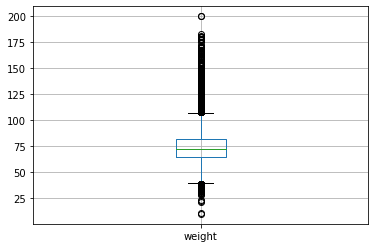

In [11]:
# Weight specifics
# df.weight.plot(kind='hist', bins=50)
df.boxplot(column='weight')
df.weight.value_counts().reset_index().sort_values(by='index')[:10]

In [29]:
# Bood pressure specifics
# df.ap_hi.plot(kind='hist', xlim=(0,400), bins=100)
# df.boxplot(column='ap_hi')
df.ap_hi.value_counts().sort_values(ascending=True).index[:20]
df.ap_hi.sort_values(ascending=True)[:30]
df[(df.ap_hi < 90)].ap_hi
df[((df.ap_lo >= 60) & (df.ap_lo <= 80) & (df.ap_hi >= 90) & (df.ap_hi <= 120))].ap_hi.mean()

115.73269677419354

# Answers

In [6]:
# Add 'overweight' column
# To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
df['overweight'] = np.select([(df.weight / ((df.height/100)**2)) > 25, (df.weight / ((df.height/100)**2)) <= 25], [1, 0])

# Same result in 2 steps
# df.loc[(df.weight / ((df.height/100)**2)) > 25, 'overwright'] = 1
# df.loc[(df.weight / ((df.height/100)**2)) <= 25,'overwright'] = 0


# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
conditions_cholesterol = [df['cholesterol'] == 1, df['cholesterol'] > 1]
conditions_gluc = [df['gluc'] == 1, df['gluc'] > 1]
values = [0, 1]

df['cholesterol_2'] = np.select(conditions_cholesterol, values)
df['gluc_2'] = np.select(conditions_gluc, values)

df['cholesterol'] = df['cholesterol_2']
df['gluc'] = df['gluc_2']
df.drop(['cholesterol_2', 'gluc_2'], axis=1, inplace=True)

print(df.tail(4), '\n\nOriginal:\n', df_original.tail(4))


          id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
69996  99995  22601    1     158   126.0    140     90            1     1   
69997  99996  19066    2     183   105.0    180     90            1     0   
69998  99998  22431    1     163    72.0    135     80            0     1   
69999  99999  20540    1     170    72.0    120     80            1     0   

       smoke  alco  active  cardio  overweight  
69996      0     0       1       1           1  
69997      0     1       0       1           1  
69998      0     0       0       1           1  
69999      0     0       1       0           0   

Original:
           id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
69996  99995  22601    1     158   126.0    140     90            2     2   
69997  99996  19066    2     183   105.0    180     90            3     1   
69998  99998  22431    1     163    72.0    135     80            1     2   
69999  99999  20540    1     170    72.0    120 

In [9]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df[['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight', 'cardio']], id_vars=['cardio'])


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = df_cat.groupby(['cardio', 'variable'])['value'].value_counts().to_frame()
    df_cat.rename(columns={'value': 'total'}, inplace=True)
    df_cat.reset_index(inplace=True)
    
    
    # Draw the catplot with 'sns.catplot()'
    fig = sns.catplot(x='variable', y='total', hue='value', data= df_cat, col='cardio', kind='bar', height=6, aspect=1.5)


    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


In [77]:
# For development purposes
df_cat = pd.melt(df[['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight', 'cardio']], id_vars=['cardio'])
df_cat = df_cat.groupby(['cardio', 'variable'])['value'].value_counts().to_frame()
df_cat.rename(columns={'value': 'total'}, inplace=True)
df_cat.reset_index(inplace=True)
df_cat
fig = sns.catplot(x='variable', y='total', hue='value', data= df_cat, col='cardio', kind='bar', height=6, aspect=1.5)

,cardio,variable,value,total
0,0,active,1,28643
1,0,active,0,6378
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,1,19106
9,0,overweight,0,15915


In [ ]:
# Draw Heat Map
def draw_heat_map():
    # Clean the data
    # Drop ap_lo > ap_hi
    df_heat = df.loc[df.ap_lo <= df.ap_hi]
    # Drop height < height_quntile_2.5=150
    df_heat = df_heat[df.height >= df.height.quantile(0.025)]
    # Drop height > height_quntile_97.5=180
    df_heat = df_heat[df.height <= df.height.quantile(0.975)]
    # Drop weight < weight_quntile_2.5=51
    df_heat = df_heat[df.weight >= df.weight.quantile(0.025)]
    # Drop weight > weight_quntile_97.5=108.8
    df_heat = df_heat[df.weight <= df.weight.quantile(0.975)]

    # Calculate the correlation matrix
    corr = df_heat.corr(method='pearson')

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    fig = plt.figure(figsize=(10, 10))

    # Draw the heatmap with 'sns.heatmap()'
    fig = plt.figure(figsize=(10, 10))
    sns.heatmap(corr, annot=True, annot_kws={"size": 7}, fmt='.1f', mask=mask, center=0.0, cmap='icefire', square=True)


In [7]:
# For development purposes
# Drop ap_lo > ap_hi
df_heat = df.loc[df.ap_lo <= df.ap_hi]
# Drop height < height_quntile_2.5=150
df_heat = df_heat[df.height >= df.height.quantile(0.025)]
# Drop height > height_quntile_97.5=180
df_heat = df_heat[df.height <= df.height.quantile(0.975)]
# Drop weight < weight_quntile_2.5=51
df_heat = df_heat[df.weight >= df.weight.quantile(0.025)]
# Drop weight > weight_quntile_97.5=108.8
df_heat = df_heat[df.weight <= df.weight.quantile(0.975)]
df_heat

C:\Users\pedro\AppData\Local\Temp/ipykernel_9188/2915615879.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_heat = df_heat[df.height >= df.height.quantile(0.025)]
C:\Users\pedro\AppData\Local\Temp/ipykernel_9188/2915615879.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_heat = df_heat[df.height <= df.height.quantile(0.975)]
C:\Users\pedro\AppData\Local\Temp/ipykernel_9188/2915615879.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_heat = df_heat[df.weight >= df.weight.quantile(0.025)]
C:\Users\pedro\AppData\Local\Temp/ipykernel_9188/2915615879.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_heat = df_heat[df.weight <= df.weight.quantile(0.975)]


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [8]:
# Pearson correlation
corr_pearson = df_heat.corr(method='pearson')
mask = np.zeros_like(corr_pearson)
mask[np.triu_indices_from(mask)] = True
corr_pearson

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


<AxesSubplot:>

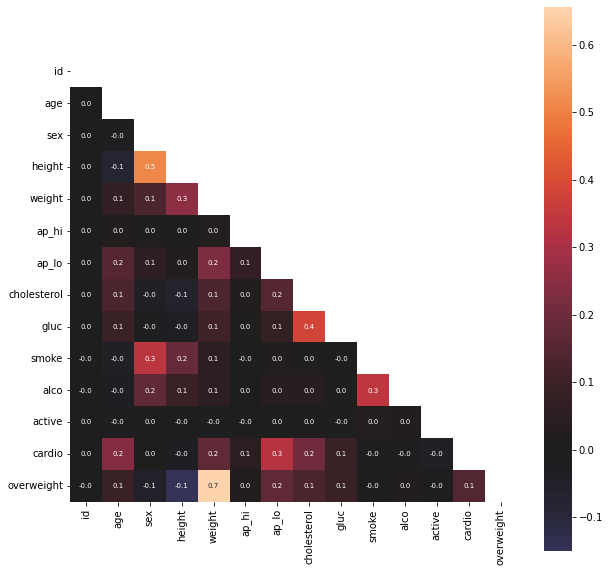

In [12]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(corr_pearson, annot=True, annot_kws={"size": 7}, fmt='.1f', mask=mask, center=0.0, cmap='icefire', square=True)